# Gender Recognition by Voice Machine Learning SVM

### Used Libraries
1. NumPy (Numerical Python)
2. Pandas
3. Matplotlib
4. Seaborn
5. Sckit learn
6. Missingno

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Content:
1. Pandas Profiling Report
2. Missingo - Missing Data
3. Seaborn - Heatmap
4. Separating Features and Labels
5. Converting String Value To int Type for Labels
6. Data Standardisation
7. Splitting Dataset into Training Set and Testing Set
8. Build SVM Model with Default Hyperparameter
9. Accuracy Score
10. Confusion Matrix with Seaborn - Heatmap
11. F1 Score

### Reading Data

In [18]:
df=pd.read_csv("voice.csv")

In [19]:
df.sample(5)

meanfreq        sd    median       Q25       Q75       IQR      skew  \
2183  0.185590  0.055953  0.196193  0.160662  0.226703  0.066041  1.800338   
2410  0.221671  0.027297  0.223519  0.211903  0.232332  0.020429  3.070838   
1911  0.085606  0.072142  0.058710  0.025865  0.139589  0.113724  2.281377   
2944  0.221302  0.038197  0.227956  0.193103  0.247973  0.054870  2.519428   
1297  0.186318  0.055211  0.205570  0.126709  0.222405  0.095696  2.116779   

           kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
2183   5.761970  0.929775  0.552874  ...  0.185590  0.150058  0.047151   
2410  12.285808  0.792244  0.140095  ...  0.221671  0.163056  0.047478   
1911  10.178822  0.943110  0.636657  ...  0.085606  0.124927  0.016129   
2944  11.305892  0.868743  0.172811  ...  0.221302  0.185145  0.019347   
1297   7.431564  0.887692  0.291939  ...  0.186318  0.119743  0.047431   

        maxfun   meandom    mindom     maxdom    dfrange   modindx   label  
2183  0.277457  1.613002  0.023438  10.453125  10.429688  0.109858  female  
2410  0.279070  1.774902  0.023438   7.828125   7.804688  0.139571  female  
1911  0.253968  0.188859  0.007812   0.757812   0.750000  0.250496  female  
2944  0.271186  0.643359  0.007812   4.984375   4.976562  0.150245  female  
1297  0.272727  0.781428  0.023438   5.085938   5.062500  0.125116    male  

[5 rows x 21 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


# Pandas Profiling Report


In [21]:
report = pp.ProfileReport(df)

report.to_file("report.html")

report

# Missingno - Missing Data

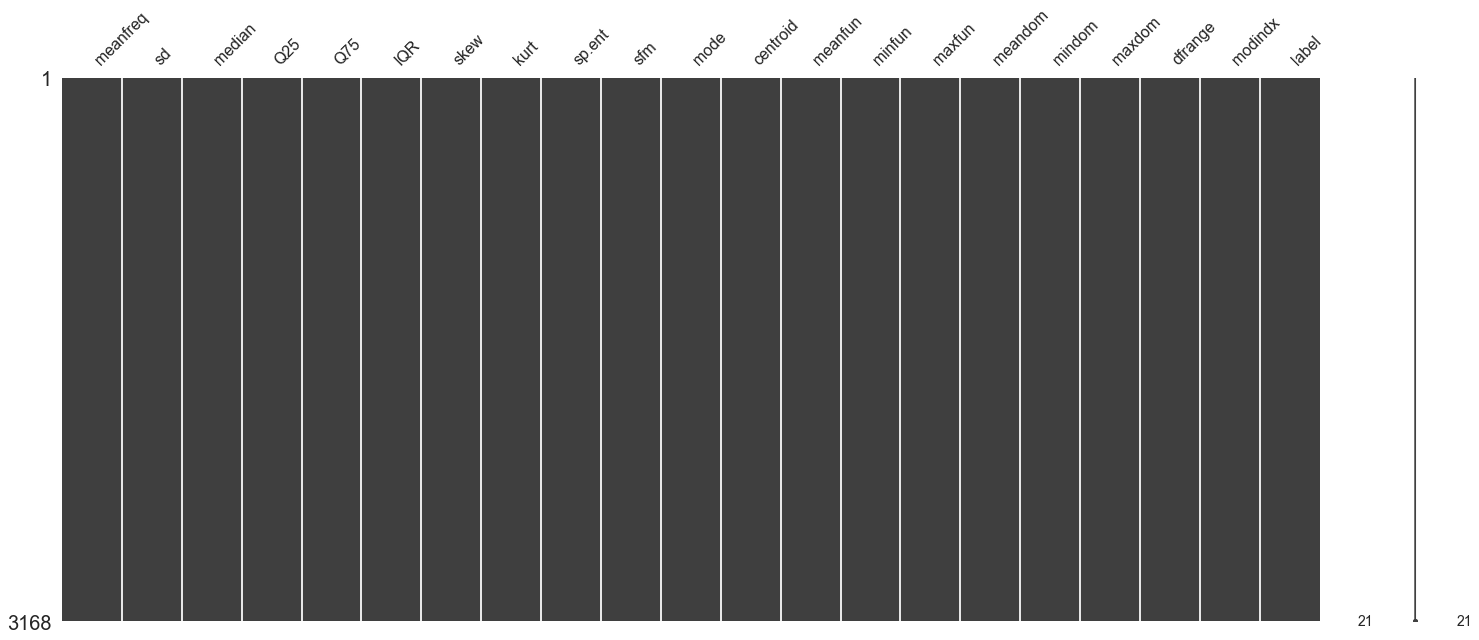

In [22]:
import missingno as msno
msno.matrix(df)
plt.show()

# Seaborn - Heatmap
### Relationship between columns
* 01 --> Direct proportion
* 00 --> No relationship
* -1 --> İnverse proportion

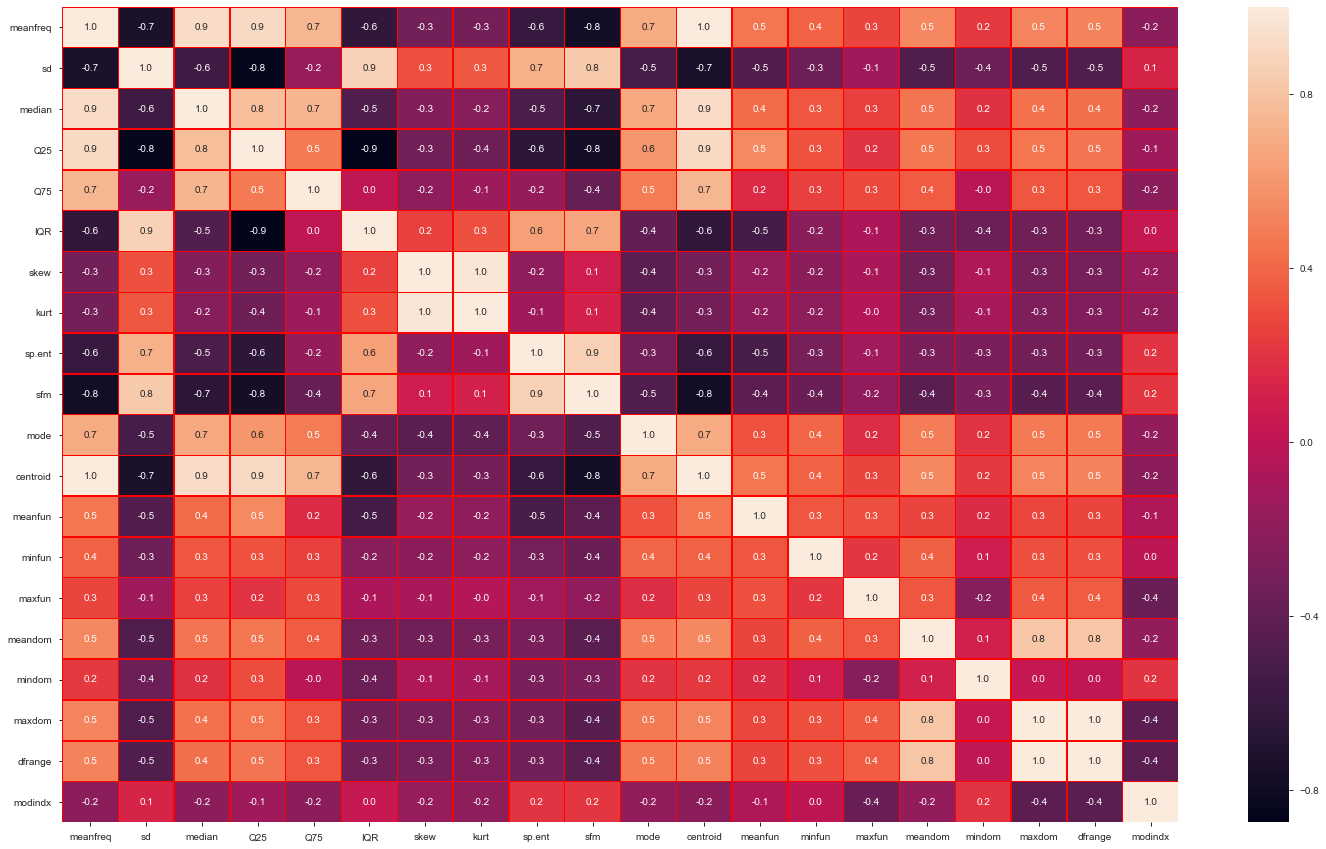

In [23]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Separating Features and Labels

In [24]:
X=df.iloc[:, :-1]
X.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274

# Converting String Value To int Type for Labels
### Encode label category
* Male -> 1
* Female -> 0

In [25]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[1 1 1 ... 0 0 0]


# Data Standardisation
### Scale the data to be between -1 and 1

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting Dataset into Training Set and Testing Set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build SVM Model with Default Hyperparameter

In [28]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

# Accuracy Score

In [29]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


# Confusion Matrix with Seaborn - Heatmap

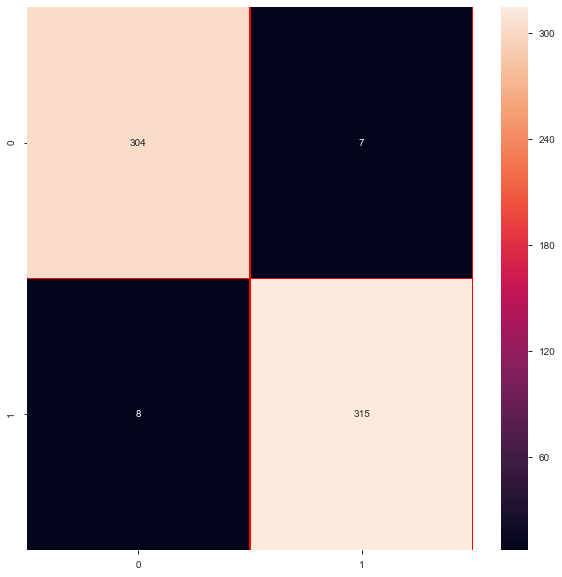

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()

# F1 Score

In [31]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.9767441860465117


# Thank You

If you have any suggestion or advice or feedback, I will be very appreciated to hear them.
### Also there are other visualization kernels
* [FIFA 19 Player Data Analysis and Visualization EDA](https://www.kaggle.com/ismailsefa/f-fa-19-player-data-analysis-and-visualization-eda)
* [Crimes Data Analysis and Visualzation (EDA)](https://www.kaggle.com/ismailsefa/crimes-data-analysis-and-visualzation-eda)
* [Google Play Store Apps Data Analysis (EDA)](https://www.kaggle.com/ismailsefa/google-play-store-apps-data-analysis-eda)
* [World Happiness Data Analysis and Visualization](https://www.kaggle.com/ismailsefa/world-happiness-data-analysis-and-visualization)
* [Used Cars Data Analysis and Visualization (EDA)](https://www.kaggle.com/ismailsefa/used-cars-data-analysis-and-visualization-eda)
* [Gender Recognition by Voice Machine Learning SVM](https://www.kaggle.com/ismailsefa/gender-recognition-by-voice-machine-learning-svm)